In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
credit_df_train=pd.read_csv('fraudTrain.csv')
credit_df_test=pd.read_csv('fraudTest.csv')

In [3]:
credit_df=pd.concat([credit_df_train,credit_df_test])

In [4]:
credit_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [6]:
credit_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
credit_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
type(credit_df)

pandas.core.frame.DataFrame

In [9]:
drop_cols=["Unnamed: 0","trans_date_trans_time","cc_num","first","last","gender","street","city","state","zip","job","dob","trans_num"]
credit_df.drop(columns=[col for col in drop_cols if col in credit_df.columns],inplace=True)

In [10]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   merchant    object 
 1   category    object 
 2   amt         float64
 3   lat         float64
 4   long        float64
 5   city_pop    int64  
 6   unix_time   int64  
 7   merch_lat   float64
 8   merch_long  float64
 9   is_fraud    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 155.5+ MB


In [11]:
categorical_cols=credit_df.select_dtypes(include=['object']).columns

# **Data Visualization**

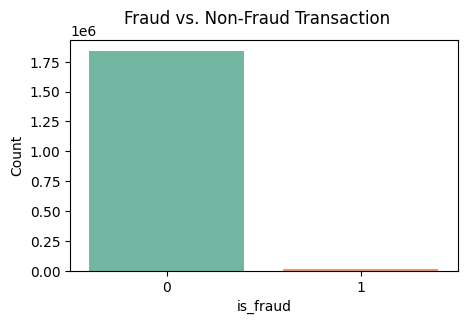

In [12]:
plt.title=plt.suptitle
plt.figure(figsize=(5,3))
sns.countplot(x="is_fraud",data=credit_df,hue="is_fraud",palette="Set2",legend=False)
plt.title("Fraud vs. Non-Fraud Transaction")
plt.xlabel=("Transaction Type(0=Legit,1=Fraud)")
plt.ylabel("Count")
plt.show()

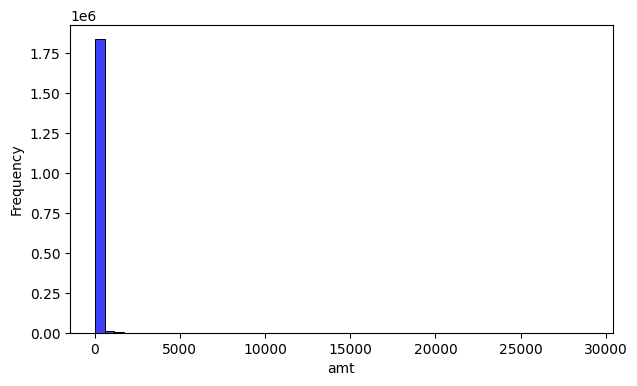

In [13]:
plt.figure(figsize=(7,4))
sns.histplot(credit_df["amt"],bins=50,color="blue")
plt.title=("Distribution of Transaction Amounts")
plt.xlabel=("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.show()

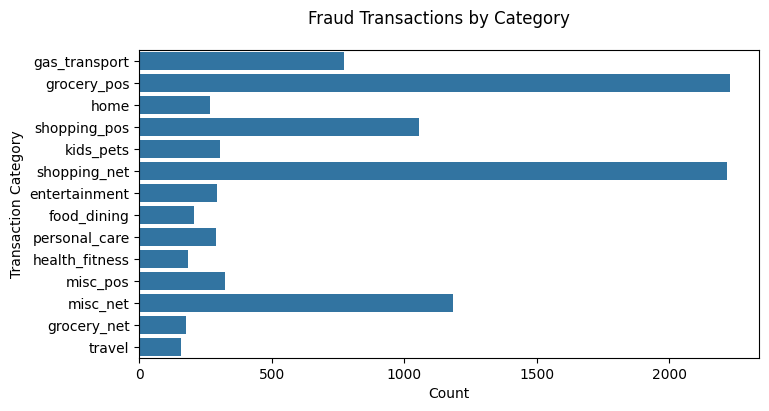

In [14]:
plt.title=plt.suptitle
plt.figure(figsize=(8,4))
sns.countplot(y=credit_df[credit_df["is_fraud"]==1]["category"],order=credit_df["category"].value_counts().index)
plt.title("Fraud Transactions by Category")
plt.xlabel = plt.gca().set_xlabel 
plt.ylabel = plt.gca().set_ylabel
plt.xlabel("Count")
plt.ylabel("Transaction Category")
plt.show()
              

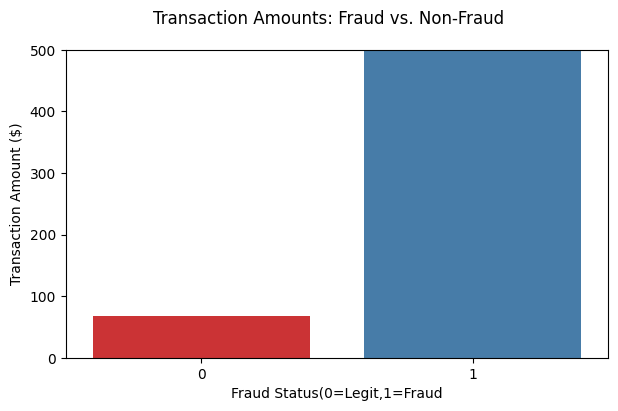

In [15]:
plt.figure(figsize=(7,4))
sns.barplot(x=credit_df["is_fraud"],y=credit_df["amt"],hue=credit_df["is_fraud"],palette="Set1",legend=False)
plt.title("Transaction Amounts: Fraud vs. Non-Fraud")
plt.xlabel = plt.gca().set_xlabel  
plt.ylabel = plt.gca().set_ylabel 
plt.xlabel("Fraud Status(0=Legit,1=Fraud")
plt.ylabel("Transaction Amount ($)")
plt.ylim(0,500)
plt.show()

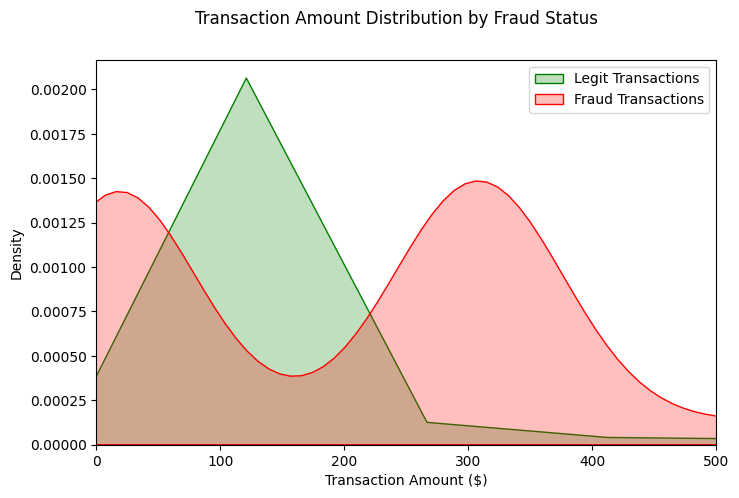

In [16]:
plt.figure(figsize=(8, 5))
sns.kdeplot(credit_df[credit_df["is_fraud"] == 0]["amt"], label="Legit Transactions",fill=True,  color="green")
sns.kdeplot(credit_df[credit_df["is_fraud"] == 1]["amt"], label="Fraud Transactions", fill=True, color="red")
plt.title("Transaction Amount Distribution by Fraud Status")
plt.xlabel = plt.gca().set_xlabel  
plt.ylabel = plt.gca().set_ylabel 
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Density")
plt.xlim(0, 500)
plt.legend()
plt.show()

In [17]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    credit_df[col] = le.fit_transform(credit_df[col])
    label_encoders[col] = le 

In [18]:
X=credit_df.drop(columns=["is_fraud"])
y=credit_df["is_fraud"]

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **Logistic Regression**

In [21]:
log_reg=LogisticRegression() 
log_reg.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred=log_reg.predict(X_test)

In [23]:
print("\n=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))


=== Logistic Regression Results ===
Accuracy: 0.9942992720235155

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



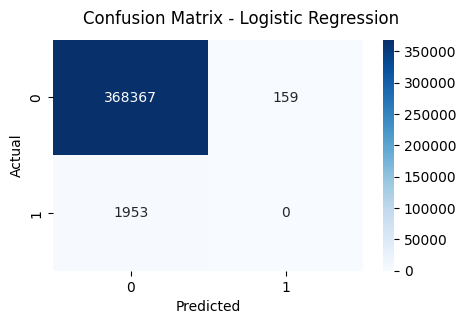

In [24]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel = plt.gca().set_xlabel  
plt.ylabel = plt.gca().set_ylabel 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Decision Tree**

In [25]:
dt_model=DecisionTreeClassifier(max_depth=5,random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [26]:
y_pred=dt_model.predict(X_test)

In [27]:
print("\n=== Decision Tree Clasifier Results ===")
print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))


=== Decision Tree Clasifier Results ===
Accuracy: 0.9967069658469171

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.78      0.52      0.63      1953

    accuracy                           1.00    370479
   macro avg       0.89      0.76      0.81    370479
weighted avg       1.00      1.00      1.00    370479



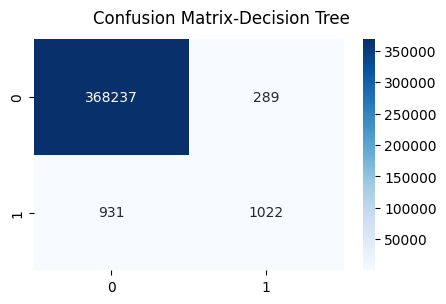

In [28]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix-Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Random Forest**

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10,n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [30]:
y_pred=rf_model.predict(X_test)

In [31]:
print("\n=== Random Forest Classifier Results===")
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))


=== Random Forest Classifier Results===
Accuracy: 0.9970281716372588

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.83      0.55      0.66      1953

    accuracy                           1.00    370479
   macro avg       0.91      0.78      0.83    370479
weighted avg       1.00      1.00      1.00    370479



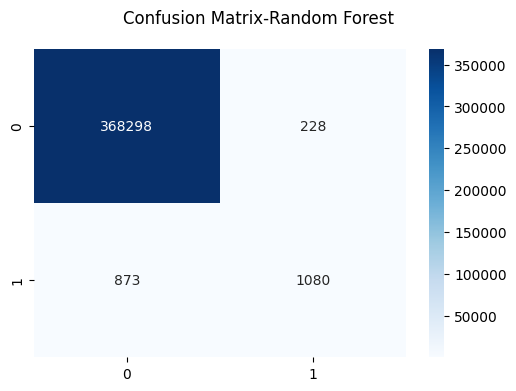

In [32]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix-Random Forest")
plt.xlabel=("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
feature_importance=rf_model.feature_importances_
sorted_idx=np.argsort(feature_importance)[::-1]

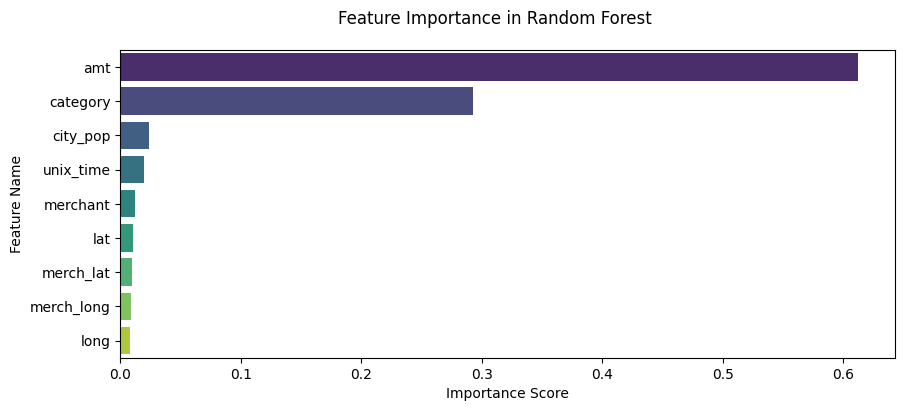

In [34]:
plt.figure(figsize=(10,4))
sns.barplot(x=feature_importance[sorted_idx],y=X.columns[sorted_idx],hue=X.columns[sorted_idx],palette="viridis",legend=False)
plt.title("Feature Importance in Random Forest")
plt.xlabel = plt.gca().set_xlabel  
plt.ylabel = plt.gca().set_ylabel 
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

In [35]:
import joblib

joblib.dump(rf_model, 'model.pkl')


['model.pkl']

In [36]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import joblib  # or pickle

# Load trained model
model = joblib.load("model.pkl")

# Predict
y_pred = model.predict(X_test)

# Save test labels and predictions
pd.DataFrame(y_test).to_csv("y_test.csv", index=False)
pd.DataFrame(y_pred, columns=["prediction"]).to_csv("y_pred.csv", index=False)

# Optional: view metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9970281716372588
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.83      0.55      0.66      1953

    accuracy                           1.00    370479
   macro avg       0.91      0.78      0.83    370479
weighted avg       1.00      1.00      1.00    370479



In [40]:
import os
from sklearn.preprocessing import LabelEncoder
import joblib

# Sample data, replace with actual unique values from your training data
merchant_data = ['ABC', 'XYZ', 'PQR']  # Replace with actual unique merchant names
category_data = ['shopping_pos', 'groceries', 'electronics']  # Replace with actual unique categories

# Initialize the label encoders
merchant_encoder = LabelEncoder()
category_encoder = LabelEncoder()

# Fit the encoders on the data
merchant_encoder.fit(merchant_data)
category_encoder.fit(category_data)

# Create 'model' directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the encoders to files
joblib.dump(merchant_encoder, 'model/merchant_encoder.pkl')
joblib.dump(category_encoder, 'model/category_encoder.pkl')

print("Encoders saved successfully!")


Encoders saved successfully!


In [41]:
print(merchant_encoder.classes_)
print(category_encoder.classes_)


['ABC' 'PQR' 'XYZ']
['electronics' 'groceries' 'shopping_pos']
